In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss 
import statsmodels.tsa.seasonal as tsa
from scipy.stats import ks_2samp

data = pd.read_csv("data/processed/csv/input.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
train_data = data.loc[pd.Timestamp(year=2016, month=7, day=1):pd.Timestamp(year=2022, month=1, day=1),]
test_data = data.loc[pd.Timestamp(year=2022, month=1, day=1):,]



In [ ]:
def get_log_returns(close: pd.Series) -> pd.Series:
    log_returns = np.empty(len(close),dtype=np.float32)
    log_returns[0] = np.NaN
    for i in range(1, len(close)):
        log_returns[i] = np.log(close[i]/close[i-1])
    
    assert len(log_returns) == len(close)
    return pd.Series(log_returns)

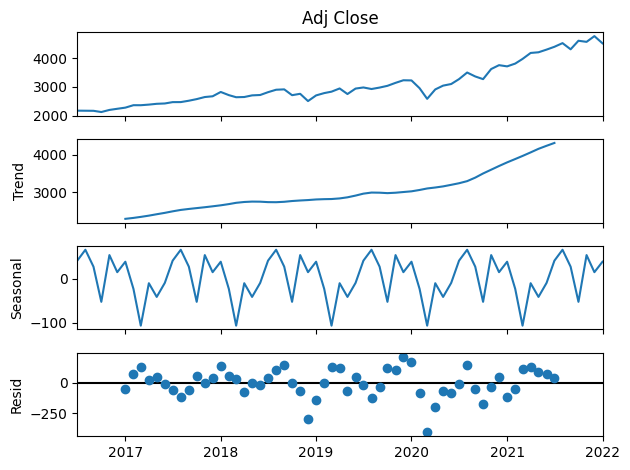

In [ ]:
decomposed = tsa.seasonal_decompose(train_data['Adj Close'], model='additive')
fig1 = decomposed.plot()

In [ ]:
log_close = get_log_returns(train_data['Adj Close'])
train_data['Log Close'] = log_close
log_close = log_close.dropna(axis=0)

/tmp/ipykernel_8454/3903693862.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  log_returns[i] = np.log(close[i]/close[i-1])
/tmp/ipykernel_8454/1791038457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Log Close'] = log_close


In [ ]:
adfuller(log_close)[1]

1.253235203576355e-14

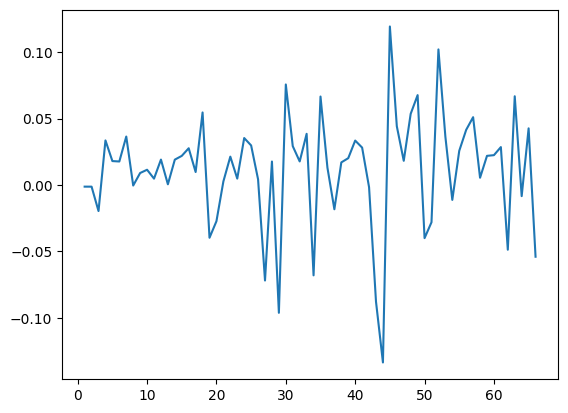

In [ ]:
plt.plot(log_close)